In [6]:
import pandas as pd
import re
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure
#print(os.listdir("../input"))
#set seed
np.random.seed(12345) # receive the same random numbers each execution
print('setup complete')

setup complete


# Data Pre-processing

In [7]:
#notclean = pd.read_csv("add file path\LM_10X_Summaries_2018.csv")
notclean.head()

,CIK,FILING_DATE,FYE,FORM_TYPE,FILE_NAME,SIC,FFInd,N_Words,N_Unique_Words,N_Negative,...,N_Constraining,N_Negation,GrossFileSize,NetFileSize,NonTextDocTypeChars,HTMLChars,XBRLChars,XMLChars,N_Tables,N_Exhibits
0,60512,19930813,19930630,10-Q,D:/Edgar/10-X_C\1993\QTR3\19930813_10-Q_edgar_...,1311,30,3037,700,68,...,6,1,63255,25233,0,186,0,0,7,0
1,66740,19930813,19930630,10-Q,D:/Edgar/10-X_C\1993\QTR3\19930813_10-Q_edgar_...,2670,38,4102,823,53,...,7,3,57283,47739,0,317,0,0,2,3
2,60512,19931007,19921231,10-K-A,D:/Edgar/10-X_C\1993\QTR4\19931007_10-K-A_edga...,1311,30,7278,1184,157,...,26,5,114136,56958,0,276,0,0,22,0
3,60512,19931110,19930930,10-Q,D:/Edgar/10-X_C\1993\QTR4\19931110_10-Q_edgar_...,1311,30,3768,739,69,...,3,1,72062,31256,0,201,0,0,8,0
4,11860,19931112,19930930,10-Q,D:/Edgar/10-X_C\1993\QTR4\19931112_10-Q_edgar_...,3312,19,3822,897,77,...,32,2,40392,39056,0,201,0,0,0,0


In [8]:
lm_10X = notclean.drop(['CIK','FILE_NAME', 'SIC', 'FFInd', 'NonTextDocTypeChars', 'HTMLChars', 'XBRLChars', 'XMLChars'], axis=1)
lm_10X.head()

,FILING_DATE,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
0,19930813,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1,19930813,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
2,19931007,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
3,19931110,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
4,19931112,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [9]:
lm_10X['FILING_DATE'] = pd.to_datetime(lm_10X['FILING_DATE'], format='%Y%m%d')
#lm_10X['FYE'] = pd.to_datetime(lm_10X['FYE'], format='%Y%m%d')
lm_10X.head()

,FILING_DATE,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
0,1993-08-13,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1,1993-08-13,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
2,1993-10-07,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
3,1993-11-10,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
4,1993-11-12,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [10]:
lm_10X = lm_10X.set_index(pd.DatetimeIndex(lm_10X['FILING_DATE']))
lm_10X = lm_10X.drop(['FILING_DATE'], axis=1)
lm_10X.head()

,FYE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
FILING_DATE,,,,,,,,,,,,,,,,,
1993-08-13,19930630,10-Q,3037,700,68,6,23,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,19930630,10-Q,4102,823,53,24,16,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,19921231,10-K-A,7278,1184,157,41,67,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,19930930,10-Q,3768,739,69,13,23,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,19930930,10-Q,3822,897,77,39,23,60,5,12,19,32,2,40392,39056,0,0


In [11]:
df = pd.read_csv("Z:\Dokumente\Studium\Bachelorthesis\S&P_500_Historical_Data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [12]:
df.index = pd.to_datetime(df.index)
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [13]:
lm_10X_snp500 = pd.merge(df, lm_10X, how='inner', left_index=True, right_index=True)
lm_10X_snp500.head()

,Open,High,Low,Close,Adj Close,Volume,FYE,FORM_TYPE,N_Words,N_Unique_Words,...,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,19930630,10-Q,3037,700,...,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,19930630,10-Q,4102,823,...,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,460.709991,461.130005,459.079987,459.179993,459.179993,255210000,19921231,10-K-A,7278,1184,...,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,460.399994,463.720001,459.570007,463.720001,463.720001,283450000,19930930,10-Q,3768,739,...,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,462.640015,465.839996,462.640015,465.390015,465.390015,326240000,19930930,10-Q,3822,897,...,60,5,12,19,32,2,40392,39056,0,0


In [10]:
lm_10X_snp500

,Open,High,Low,Close,Adj Close,Volume,FYE,FORM_TYPE,N_Words,N_Unique_Words,...,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation,GrossFileSize,NetFileSize,N_Tables,N_Exhibits
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,19930630,10-Q,3037,700,...,40,6,5,9,6,1,63255,25233,7,0
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,19930630,10-Q,4102,823,...,20,7,8,9,7,3,57283,47739,2,3
1993-10-07,460.709991,461.130005,459.079987,459.179993,459.179993,255210000,19921231,10-K-A,7278,1184,...,104,15,15,31,26,5,114136,56958,22,0
1993-11-10,460.399994,463.720001,459.570007,463.720001,463.720001,283450000,19930930,10-Q,3768,739,...,50,4,7,16,3,1,72062,31256,8,0
1993-11-12,462.640015,465.839996,462.640015,465.390015,465.390015,326240000,19930930,10-Q,3822,897,...,60,5,12,19,32,2,40392,39056,0,0
1993-11-12,462.640015,465.839996,462.640015,465.390015,465.390015,326240000,19930930,10-Q,3450,848,...,43,9,8,4,23,3,51625,28738,11,0
1993-11-12,462.640015,465.839996,462.640015,465.390015,465.390015,326240000,19930930,10-Q,3767,791,...,31,8,10,7,8,1,51346,41630,2,3
1993-11-29,463.059998,464.829987,461.829987,461.899994,461.899994,272710000,19930831,10-K,18063,1942,...,281,53,42,48,88,14,278174,159453,35,2
1993-12-13,463.929993,465.709991,462.709991,465.700012,465.700012,256580000,19930930,10-K,12826,1473,...,132,20,34,65,91,2,166496,117190,12,1
1993-12-14,465.730011,466.119995,462.459991,463.059998,463.059998,275050000,19931030,10-Q,1741,463,...,15,2,8,5,9,1,28487,15442,6,0


In [14]:
lm_10X_snp500 = lm_10X_snp500.drop(['FYE','FORM_TYPE','GrossFileSize', 'NetFileSize', 'N_Tables', 'N_Exhibits'], axis=1)
lm_10X_snp500.head()

,Open,High,Low,Close,Adj Close,Volume,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,448.970001,450.250000,448.970001,450.140015,450.140015,214370000,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,460.709991,461.130005,459.079987,459.179993,459.179993,255210000,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,460.399994,463.720001,459.570007,463.720001,463.720001,283450000,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,462.640015,465.839996,462.640015,465.390015,465.390015,326240000,3822,897,77,39,23,60,5,12,19,32,2


In [12]:
lm_10X_snp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1022593 entries, 1993-08-13 to 2018-12-31
Data columns (total 17 columns):
Open                1022593 non-null float64
High                1022593 non-null float64
Low                 1022593 non-null float64
Close               1022593 non-null float64
Adj Close           1022593 non-null float64
Volume              1022593 non-null int64
N_Words             1022593 non-null int64
N_Unique_Words      1022593 non-null int64
N_Negative          1022593 non-null int64
N_Positive          1022593 non-null int64
N_Uncertainty       1022593 non-null int64
N_Litigious         1022593 non-null int64
N_ModalWeak         1022593 non-null int64
N_Modal_Moderate    1022593 non-null int64
N_Modal_Strong      1022593 non-null int64
N_Constraining      1022593 non-null int64
N_Negation          1022593 non-null int64
dtypes: float64(5), int64(12)
memory usage: 140.4 MB


# Exploratory Analysis

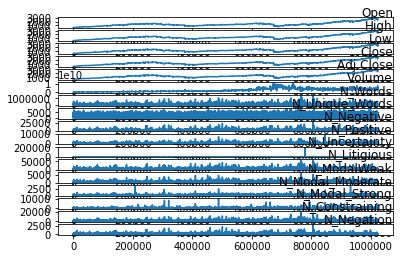

In [15]:
values = lm_10X_snp500.values
groups = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(lm_10X_snp500.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [16]:
lm_10X_snp500.describe()

,Open,High,Low,Close,Adj Close,Volume,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
count,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06,1.022593e+06
mean,1.311059e+03,1.319625e+03,1.302412e+03,1.311721e+03,1.311721e+03,2.368351e+09,1.813307e+04,1.535070e+03,2.994437e+02,1.109818e+02,2.014528e+02,3.312975e+02,8.423879e+01,4.940433e+01,5.629233e+01,1.411584e+02,1.522095e+01
std,4.680510e+02,4.689824e+02,4.667529e+02,4.680317e+02,4.680317e+02,1.704995e+09,2.612568e+04,9.048268e+02,4.846705e+02,1.650993e+02,3.328384e+02,8.453337e+02,1.412381e+02,6.107526e+01,9.162540e+01,2.672834e+02,3.170178e+01
min,4.391400e+02,4.447200e+02,4.358600e+02,4.389200e+02,4.389200e+02,1.499000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.058560e+03,1.067580e+03,1.052960e+03,1.060870e+03,1.060870e+03,9.243000e+08,4.507000e+03,8.420000e+02,5.400000e+01,2.000000e+01,4.200000e+01,3.000000e+01,1.100000e+01,1.200000e+01,1.100000e+01,2.400000e+01,3.000000e+00
50%,1.234720e+03,1.239030e+03,1.226200e+03,1.233760e+03,1.233760e+03,1.816900e+09,1.018900e+04,1.352000e+03,1.360000e+02,5.400000e+01,1.090000e+02,8.500000e+01,3.000000e+01,3.000000e+01,2.800000e+01,6.100000e+01,7.000000e+00
75%,1.425280e+03,1.440160e+03,1.416540e+03,1.427840e+03,1.427840e+03,3.635170e+09,2.141600e+04,2.042000e+03,3.450000e+02,1.340000e+02,2.500000e+02,2.730000e+02,9.400000e+01,6.300000e+01,6.800000e+01,1.510000e+02,1.500000e+01
max,2.936760e+03,2.940910e+03,2.927110e+03,2.930750e+03,2.930750e+03,1.145623e+10,1.407044e+06,8.316000e+03,2.900000e+04,9.674000e+03,2.016710e+05,5.640400e+04,6.347000e+03,3.545000e+03,9.901000e+03,2.052100e+04,2.891000e+03


In [17]:
cor = lm_10X_snp500.corr()
cor

,Open,High,Low,Close,Adj Close,Volume,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
Open,1.000000,0.999823,0.999746,0.999533,0.999533,0.383286,0.143294,0.237492,0.143271,0.158248,0.184003,0.035384,0.195451,0.230907,0.129868,0.125991,0.072890
High,0.999823,1.000000,0.999706,0.999788,0.999788,0.384779,0.143018,0.237159,0.143037,0.158004,0.183783,0.035260,0.195252,0.230543,0.129695,0.125778,0.072731
Low,0.999746,0.999706,1.000000,0.999797,0.999797,0.378891,0.142765,0.236629,0.142832,0.157679,0.183549,0.035045,0.195039,0.230317,0.129338,0.125621,0.072513
Close,0.999533,0.999788,0.999797,1.000000,1.000000,0.380887,0.142458,0.236268,0.142575,0.157399,0.183302,0.034914,0.194775,0.229903,0.129111,0.125379,0.072335
Adj Close,0.999533,0.999788,0.999797,1.000000,1.000000,0.380887,0.142458,0.236268,0.142575,0.157399,0.183302,0.034914,0.194775,0.229903,0.129111,0.125379,0.072335
Volume,0.383286,0.384779,0.378891,0.380887,0.380887,1.000000,0.160323,0.278415,0.160811,0.178483,0.205240,0.025869,0.193806,0.279386,0.146907,0.133423,0.075854
N_Words,0.143294,0.143018,0.142765,0.142458,0.142458,0.160323,1.000000,0.809166,0.959051,0.939099,0.722660,0.914602,0.891023,0.878831,0.849359,0.956559,0.889842
N_Unique_Words,0.237492,0.237159,0.236629,0.236268,0.236268,0.278415,0.809166,1.000000,0.792838,0.830631,0.687661,0.616014,0.801095,0.849348,0.733284,0.716759,0.647483
N_Negative,0.143271,0.143037,0.142832,0.142575,0.142575,0.160811,0.959051,0.792838,1.000000,0.916033,0.711416,0.894612,0.887906,0.859551,0.835781,0.926877,0.905439
N_Positive,0.158248,0.158004,0.157679,0.157399,0.157399,0.178483,0.939099,0.830631,0.916033,1.000000,0.727986,0.804773,0.896281,0.891289,0.842779,0.871109,0.795195


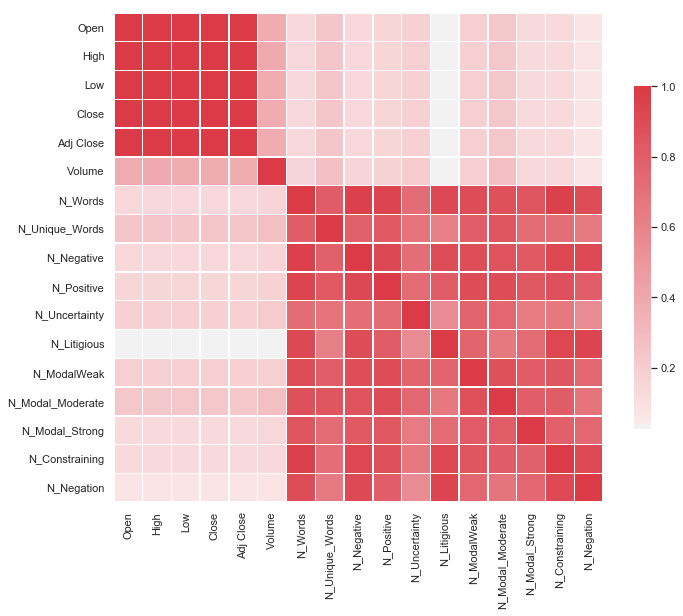

In [18]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

C:\Users\Dennis Thumm\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


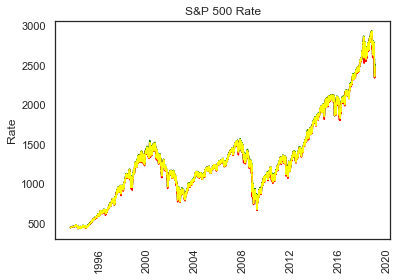

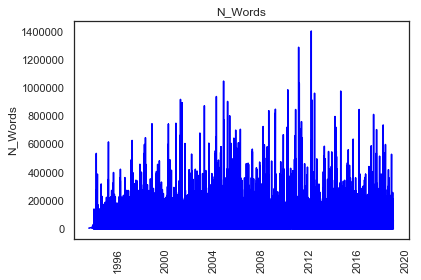

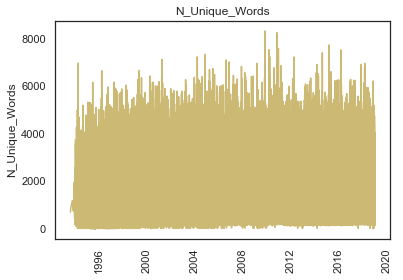

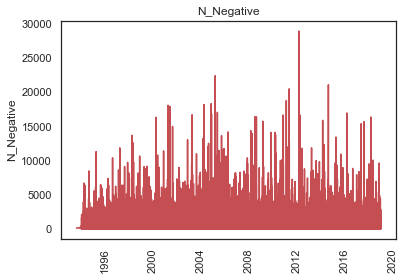

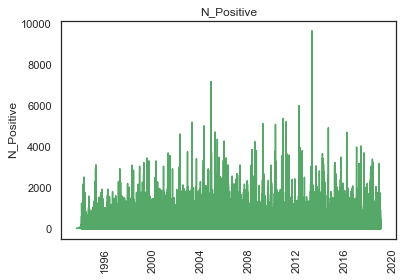

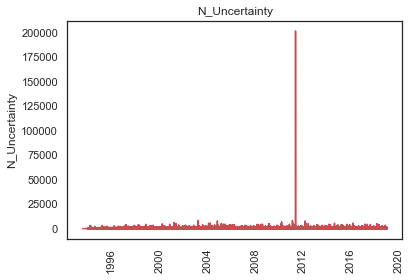

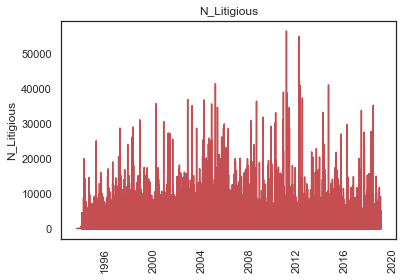

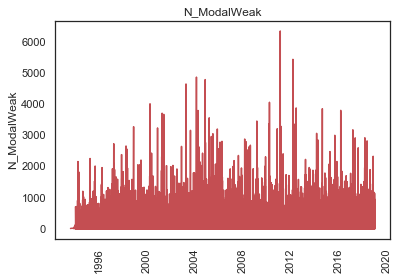

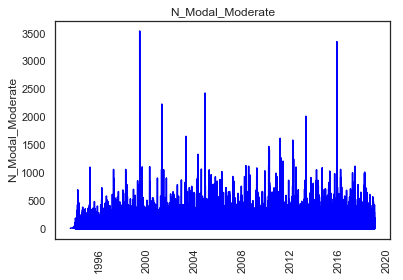

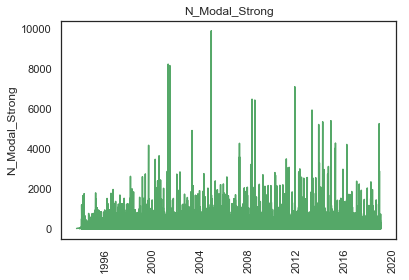

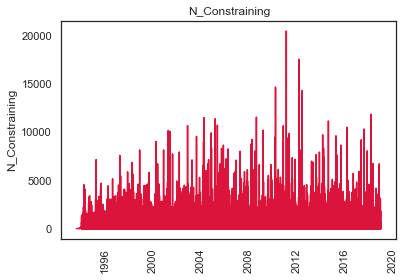

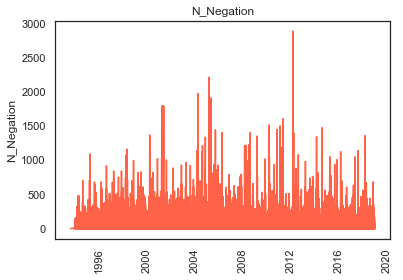

In [17]:
plt.plot(lm_10X_snp500.index, lm_10X_snp500['Close'], 'black')
plt.plot(lm_10X_snp500.index, lm_10X_snp500['High'], 'green')
plt.plot(lm_10X_snp500.index, lm_10X_snp500['Low'], 'red')
plt.plot(lm_10X_snp500.index, lm_10X_snp500['Open'], 'yellow')
plt.title('S&P 500 Rate')
plt.xticks(rotation='vertical')
plt.ylabel('Rate');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Words'], 'blue')
plt.title('N_Words')
plt.xticks(rotation='vertical')
plt.ylabel('N_Words');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Unique_Words'], 'y')
plt.title('N_Unique_Words')
plt.xticks(rotation='vertical')
plt.ylabel('N_Unique_Words');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Negative'], 'r')
plt.title('N_Negative')
plt.xticks(rotation='vertical')
plt.ylabel('N_Negative');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Positive'], 'g')
plt.title('N_Positive')
plt.xticks(rotation='vertical')
plt.ylabel('N_Positive');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Uncertainty'], 'r')
plt.title('N_Uncertainty')
plt.xticks(rotation='vertical')
plt.ylabel('N_Uncertainty');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Litigious'], 'r')
plt.title('N_Litigious')
plt.xticks(rotation='vertical')
plt.ylabel('N_Litigious');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_ModalWeak'], 'r')
plt.title('N_ModalWeak')
plt.xticks(rotation='vertical')
plt.ylabel('N_ModalWeak');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Modal_Moderate'], 'blue')
plt.title('N_Modal_Moderate')
plt.xticks(rotation='vertical')
plt.ylabel('N_Modal_Moderate');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Modal_Strong'], 'g')
plt.title('N_Modal_Strong')
plt.xticks(rotation='vertical')
plt.ylabel('N_Modal_Strong');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Constraining'], 'crimson')
plt.title('N_Constraining')
plt.xticks(rotation='vertical')
plt.ylabel('N_Constraining');
plt.show();

plt.plot(lm_10X_snp500.index, lm_10X_snp500['N_Negation'], 'tomato')
plt.title('N_Negation')
plt.xticks(rotation='vertical')
plt.ylabel('N_Negation');
plt.show();
#plt.legend()

In [19]:
#LSTM Prep
df = lm_10X_snp500
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1022593 entries, 1993-08-13 to 2018-12-31
Data columns (total 17 columns):
Open                1022593 non-null float64
High                1022593 non-null float64
Low                 1022593 non-null float64
Close               1022593 non-null float64
Adj Close           1022593 non-null float64
Volume              1022593 non-null int64
N_Words             1022593 non-null int64
N_Unique_Words      1022593 non-null int64
N_Negative          1022593 non-null int64
N_Positive          1022593 non-null int64
N_Uncertainty       1022593 non-null int64
N_Litigious         1022593 non-null int64
N_ModalWeak         1022593 non-null int64
N_Modal_Moderate    1022593 non-null int64
N_Modal_Strong      1022593 non-null int64
N_Constraining      1022593 non-null int64
N_Negation          1022593 non-null int64
dtypes: float64(5), int64(12)
memory usage: 140.4 MB


In [20]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume',], axis=1)
df.head()

,Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,450.140015,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,450.140015,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,459.179993,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,463.720001,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,465.390015,3822,897,77,39,23,60,5,12,19,32,2


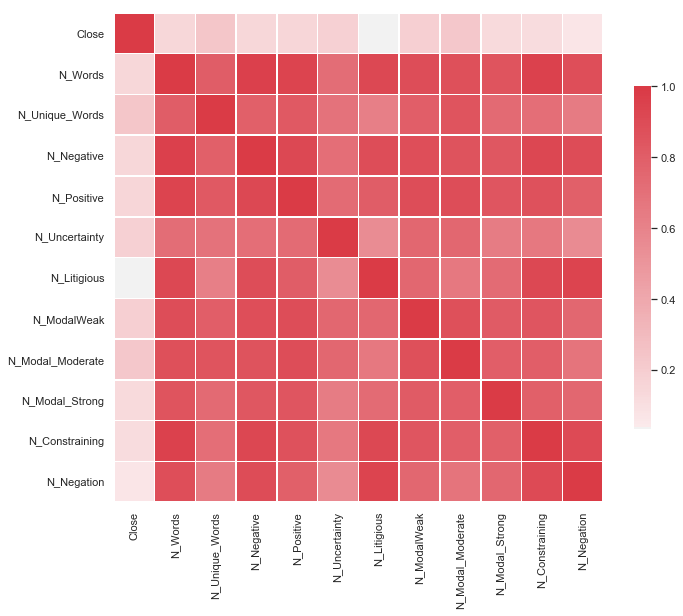

In [21]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.7})
plt.show()

In [21]:
lm_10X_snp500.median()

Open                1.234720e+03
High                1.239030e+03
Low                 1.226200e+03
Close               1.233760e+03
Adj Close           1.233760e+03
Volume              1.816900e+09
N_Words             1.018900e+04
N_Unique_Words      1.352000e+03
N_Negative          1.360000e+02
N_Positive          5.400000e+01
N_Uncertainty       1.090000e+02
N_Litigious         8.500000e+01
N_ModalWeak         3.000000e+01
N_Modal_Moderate    3.000000e+01
N_Modal_Strong      2.800000e+01
N_Constraining      6.100000e+01
N_Negation          7.000000e+00
dtype: float64

# LSTM Model

In [37]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('vars%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [38]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [39]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close', 'N_Words', 'N_Unique_Words', 'N_Negative', 'N_Positive', 'N_Uncertainty', 'N_Litigious', 'N_ModalWeak', 'N_Modal_Moderate', 'N_Modal_Strong', 'N_Constraining', 'N_Negation']]
df.head()

,Close,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,N_ModalWeak,N_Modal_Moderate,N_Modal_Strong,N_Constraining,N_Negation
1993-08-13,450.140015,3037,700,68,6,23,40,6,5,9,6,1
1993-08-13,450.140015,4102,823,53,24,16,20,7,8,9,7,3
1993-10-07,459.179993,7278,1184,157,41,67,104,15,15,31,26,5
1993-11-10,463.720001,3768,739,69,13,23,50,4,7,16,3,1
1993-11-12,465.390015,3822,897,77,39,23,60,5,12,19,32,2


In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [41]:
n_weeks = 12 #adding 12 weeks (= one quarter) lags creating number of observations
n_features = 12 #features in the dataset
n_obs = n_weeks*n_features

In [42]:
reframed = series_to_supervised(scaled, n_weeks, 1)
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var8(t-12),var9(t-12),var10(t-12),...,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t)
12,0.004503,0.002158,0.084175,0.002345,0.000620,0.000114,0.000709,0.000945,0.001410,0.000909,...,0.307720,0.013276,0.020777,0.001155,0.011754,0.017173,0.009027,0.005050,0.007602,0.007610
13,0.004503,0.002915,0.098966,0.001828,0.002481,0.000079,0.000355,0.001103,0.002257,0.000909,...,0.165705,0.004931,0.012611,0.000431,0.001135,0.002994,0.003667,0.001717,0.002924,0.000692
14,0.008131,0.005173,0.142376,0.005414,0.004238,0.000332,0.001844,0.002363,0.004231,0.003131,...,0.066619,0.000828,0.001344,0.000069,0.000213,0.000158,0.000564,0.000707,0.000731,0.000000
15,0.009953,0.002678,0.088865,0.002379,0.001344,0.000114,0.000886,0.000630,0.001975,0.001616,...,0.055796,0.000690,0.001240,0.000069,0.000248,0.000158,0.000282,0.000505,0.000244,0.000346
16,0.010623,0.002716,0.107864,0.002655,0.004031,0.000114,0.001064,0.000788,0.003385,0.001919,...,0.044974,0.000241,0.000207,0.000020,0.000142,0.000315,0.000564,0.000000,0.000877,0.000000


In [43]:
print(reframed.head())

    var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
12    0.004503    0.002158    0.084175    0.002345    0.000620    0.000114   
13    0.004503    0.002915    0.098966    0.001828    0.002481    0.000079   
14    0.008131    0.005173    0.142376    0.005414    0.004238    0.000332   
15    0.009953    0.002678    0.088865    0.002379    0.001344    0.000114   
16    0.010623    0.002716    0.107864    0.002655    0.004031    0.000114   

    var7(t-12)  var8(t-12)  var9(t-12)  var10(t-12)  ...   var3(t)   var4(t)  \
12    0.000709    0.000945    0.001410     0.000909  ...  0.307720  0.013276   
13    0.000355    0.001103    0.002257     0.000909  ...  0.165705  0.004931   
14    0.001844    0.002363    0.004231     0.003131  ...  0.066619  0.000828   
15    0.000886    0.000630    0.001975     0.001616  ...  0.055796  0.000690   
16    0.001064    0.000788    0.003385     0.001919  ...  0.044974  0.000241   

     var5(t)   var6(t)   var7(t)   var8(t)   var9(

In [44]:
values = reframed.values
n_train_days = 715815 #1022593*.7
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(715815, 156)

In [45]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [46]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_weeks, n_features))
test_X = test_X.reshape((test_X.shape[0], n_weeks, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(715815, 12, 12) (715815,) (306766, 12, 12) (306766,)


In [47]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))# number of units?, stateful=True?
model.add(Dense(1)) #single output value
model.compile(loss='mae', optimizer='adam', metrics=['mse','mape']) #metrics=['mse', 'mape'] to further check optimal epoch size
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=21474, validation_data=(test_X, test_y), verbose=2, shuffle=False, validation_split=0.2)
# plot history

Train on 715815 samples, validate on 306766 samples
Epoch 1/50
 - 12s - loss: 0.0948 - mean_squared_error: 0.0127 - mean_absolute_percentage_error: 456.2778 - val_loss: 0.1581 - val_mean_squared_error: 0.0443 - val_mean_absolute_percentage_error: 23.9939
Epoch 2/50
 - 9s - loss: 0.0484 - mean_squared_error: 0.0036 - mean_absolute_percentage_error: 1593.8782 - val_loss: 0.1425 - val_mean_squared_error: 0.0367 - val_mean_absolute_percentage_error: 21.5292
Epoch 3/50
 - 9s - loss: 0.0430 - mean_squared_error: 0.0028 - mean_absolute_percentage_error: 1431.0975 - val_loss: 0.1262 - val_mean_squared_error: 0.0295 - val_mean_absolute_percentage_error: 18.9850
Epoch 4/50
 - 9s - loss: 0.0371 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 1278.0664 - val_loss: 0.1130 - val_mean_squared_error: 0.0243 - val_mean_absolute_percentage_error: 16.8416
Epoch 5/50
 - 9s - loss: 0.0309 - mean_squared_error: 0.0015 - mean_absolute_percentage_error: 1081.2473 - val_loss: 0.0975 - val_mean_s

Epoch 41/50
 - 9s - loss: 0.0062 - mean_squared_error: 5.9574e-05 - mean_absolute_percentage_error: 92.0384 - val_loss: 0.0502 - val_mean_squared_error: 0.0058 - val_mean_absolute_percentage_error: 7.3721
Epoch 42/50
 - 9s - loss: 0.0040 - mean_squared_error: 2.4383e-05 - mean_absolute_percentage_error: 23.7030 - val_loss: 0.0453 - val_mean_squared_error: 0.0057 - val_mean_absolute_percentage_error: 6.0718
Epoch 43/50
 - 9s - loss: 0.0028 - mean_squared_error: 1.3283e-05 - mean_absolute_percentage_error: 174.2364 - val_loss: 0.0445 - val_mean_squared_error: 0.0056 - val_mean_absolute_percentage_error: 5.9089
Epoch 44/50
 - 8s - loss: 0.0024 - mean_squared_error: 1.0255e-05 - mean_absolute_percentage_error: 144.1417 - val_loss: 0.0423 - val_mean_squared_error: 0.0052 - val_mean_absolute_percentage_error: 5.6516
Epoch 45/50
 - 9s - loss: 0.0034 - mean_squared_error: 1.7221e-05 - mean_absolute_percentage_error: 118.0865 - val_loss: 0.0383 - val_mean_squared_error: 0.0044 - val_mean_absolu

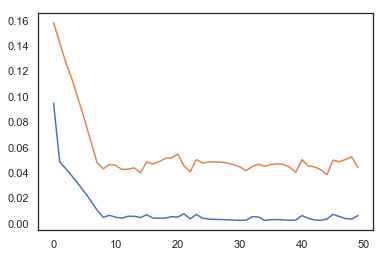

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend
plt.show()

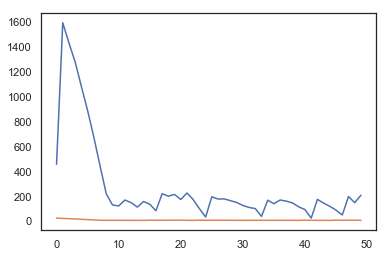

In [49]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend
plt.show()

In [50]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_weeks * n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -11:]), axis=1) #-11 for amount of features (12-11=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -11:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae =(mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)
mape =(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % mape)

Test MSE: 33308.127
Test RMSE: 182.505
Test MAE: 109.197
Test MAPE: 4.767


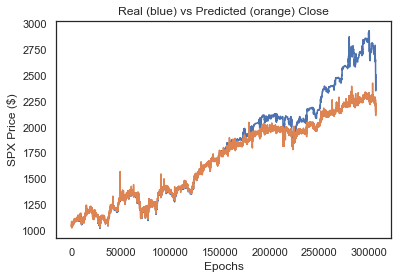

In [52]:
plt.plot(inv_y, label='Real')#blue
plt.plot(inv_yhat, label='Predicted')#orange
plt.title('Real (blue) vs Predicted (orange) Close')
plt.ylabel('SPX Price ($)')
plt.xlabel('Epochs')
plt.show()